In [1]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
font = {'size'   : 14,
        'family': 'serif'}

mpl.rc('font', **font)
sns.set_style("whitegrid")

In [3]:
mpl.rcParams["axes.labelsize"] = "large"
mpl.rcParams["legend.fontsize"] = "large"

In [4]:
DOE_NAME = "doe5"
factors = ["max_time", "batch_size", "seq_len", "seq_est_len",  "est_type"]
response = "FIT"

In [5]:
df_res = pd.read_csv(DOE_NAME + "_res.csv")  # doe1_res.csv
df_res["est_type"] = df_res["est_type"].replace({"RAND": "R", "FF": "F", "ZERO": "Z", "LSTM": "L"})

In [6]:
df_res.sort_values(by=response, inplace=True, ascending=False)
df_res["RMSE"] = df_res["RMSE"].fillna(1000)
df_res["FIT"] = df_res["FIT"] * (df_res["FIT"] > 0) # minimum fit to 0% (easier to interpret)
df_res["FIT"] = df_res["FIT"].fillna(0.0)
#df_res["FIT"] = df_res["FIT"].fillna(np.min(df_res["FIT"])-0.1)

In [7]:
for factor in factors:
    df_res[factor] = df_res[factor].astype("category")

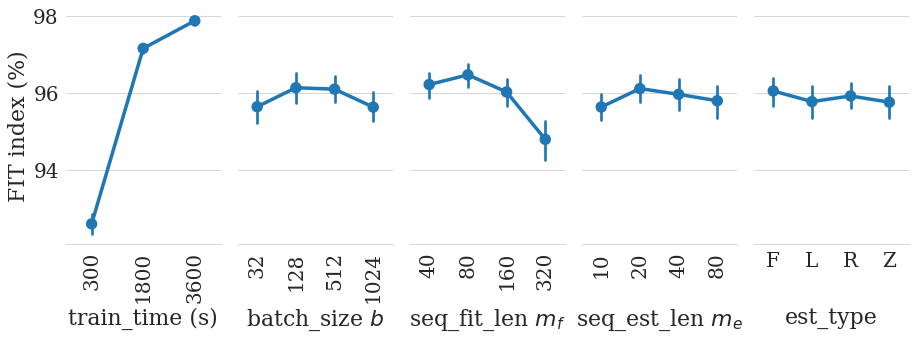

In [115]:
# Full results: main effects
factors = ["max_time", "batch_size", "seq_len", "seq_est_len",  "est_type"]
factor_names = ["train_time (s)",
                "batch_size $b$",
                "seq_fit_len $m_f$",
                "seq_est_len $m_e$",
                "est_type"]

#fig, ax = pyplot.subplots(figsize=(10,10))
g = sns.PairGrid(df_res, y_vars=response,
                 x_vars=factors, # all factors
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)

for idx in range(len(factors)):
    g.axes[0, idx].xaxis.set_label_text(factor_names[idx], fontsize = 22)
    g.axes[0, idx].xaxis.set_tick_params(labelsize=20, rotation=90)
    g.axes[0, idx].yaxis.set_label_text("FIT index (%)", fontsize = 22)
    g.axes[0, idx].yaxis.set_tick_params(labelsize=20)
g.axes[0, 4].xaxis.set_tick_params(labelsize=20, rotation=0)
g.fig.align_xlabels()
g.fig.set_size_inches(13, 5)
plt.tight_layout()
plt.savefig("wh_main_effects.pdf")
# Biggest effect seems to be max_time

In [9]:
font = {'size'   : 16,
        'family': 'serif'}

mpl.rc('font', **font)

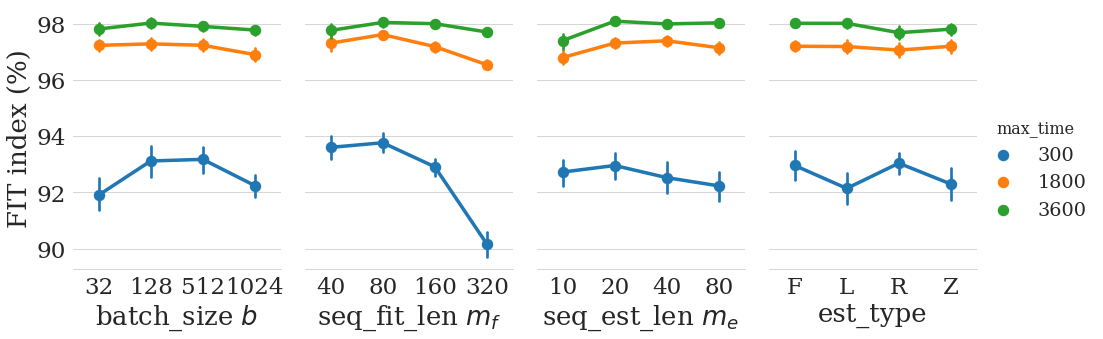

In [86]:
# Full results: main effects
factors = ["batch_size", "seq_len", "seq_est_len",  "est_type"]
factor_names = ["batch_size $b$",
                "seq_fit_len $m_f$",
                "seq_est_len $m_e$",
                "est_type"]
g = sns.PairGrid(df_res, y_vars=response,
                 x_vars=factors, # all factors
                 hue="max_time",
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)
for idx in range(len(factors)):
    g.axes[0, idx].xaxis.set_label_text(factor_names[idx], fontsize = 26)
    g.axes[0, idx].xaxis.set_tick_params(labelsize=23)

g.axes[0, 0].yaxis.set_label_text("FIT index (%)", fontsize = 26)
g.axes[0, 0].yaxis.set_tick_params(labelsize=23)
g.fig.set_size_inches(14, 5)
plt.tight_layout()
g.add_legend()#title = "train time (s)")
#plt.legend(title = "train time (s)", fontsize='18', title_fontsize='18',bbox_to_anchor=(-0.7,1), frameon=True, ncol= 3)
plt.savefig("wh_train_time_interactions.pdf")
# Biggest effect seems to be max_time

In [11]:
df_short_est = pd.DataFrame(df_res[(df_res["seq_est_len"] == 10) & (df_res["max_time"] == 3600)])

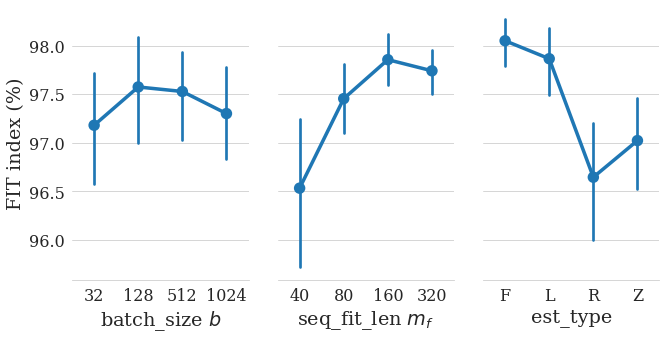

In [12]:
# Full results: main effects
factors = ["batch_size", "seq_len", "est_type"]
factor_names = ["batch_size $b$",
                "seq_fit_len $m_f$",
                "est_type"]
g = sns.PairGrid(df_short_est, y_vars=response,
                 x_vars=["batch_size", "seq_len", "est_type"],
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)
for idx in range(len(factors)):
    g.axes[0, idx].xaxis.set_label_text(factor_names[idx])
    g.axes[0, idx].yaxis.set_label_text("FIT index (%)")
plt.tight_layout()
g.fig.set_size_inches(10,5)
#plt.savefig("wh_main_effects_restricted.pdf")
# Biggest effect seems to be max_time

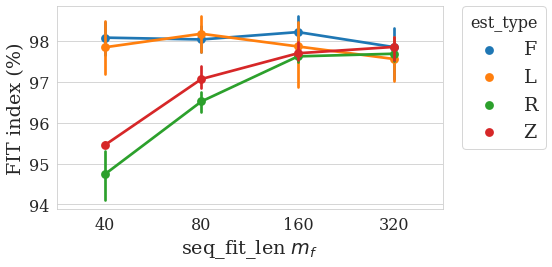

In [13]:
fig, ax = plt.subplots(1,1, figsize=(8, 4))
g = sns.pointplot(x="seq_len", y=response, hue="est_type", data=df_short_est, ax=ax);
g.axes.yaxis.set_label_text("FIT index")
g.axes.xaxis.set_label_text("seq_fit_len $m_f$");
g.legend(title = "estimator type");
g.yaxis.set_label_text("FIT index (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="est_type")
plt.tight_layout()
plt.savefig("wh_est_type_interactions_restricted.pdf")

In [14]:
df_short_seq = pd.DataFrame(df_res[(df_res["seq_len"] == 40) & (df_res["max_time"] == 3600)])

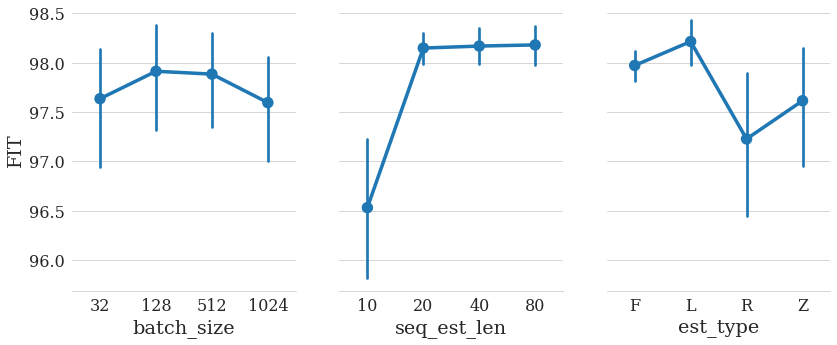

In [15]:
# Full results: main effects
factors = ["batch_size", "seq_est_len", "est_type"]
factor_names = ["batch_size $b$",
                "seq_est_len $m_e$",
                "est_type"]
g = sns.PairGrid(df_short_seq, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.8)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)
plt.savefig("wh_main_effects_restricted.pdf")

In [16]:
df_short_seq["est_type"] = df_short_seq["est_type"].replace({"R": "RAND", "F": "FF", "Z": "ZERO", "L": "LSTM"})

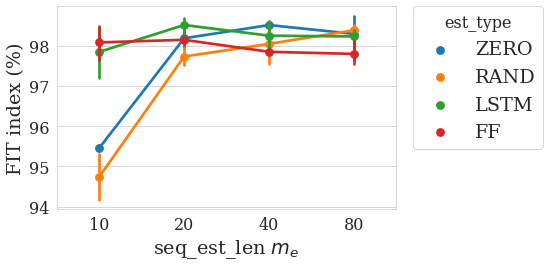

In [17]:
fig, ax = plt.subplots(1,1, figsize=(8, 4))
g = sns.pointplot(x="seq_est_len", y=response, hue="est_type", data=df_short_seq);
g.axes.yaxis.set_label_text("FIT index")
g.axes.xaxis.set_label_text("seq_est_len $m_e$");
g.yaxis.set_label_text("FIT index (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="est_type")
plt.tight_layout()
plt.savefig("wh_est_type_interactions_restricted.pdf")